# Reviewing Gm/ID in gf180mcuD

Peter Kinget 
June 2025

Based on Boris Murmann's script. 

In [1]:
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt
from pygmid import Lookup as lk
%matplotlib widget

In [2]:
choice = 0  #set to 0 for nmos and 1 for pmos
devices = ['nfet_03v3', 'pfet_03v3']
fet = lk('./simulation/'+devices[choice]+'.mat')

In [3]:
# Current Density Reference Current
# weak inversion
K_wi = np.array([ 28, 27 ]) # S/A
# strong inversion
K_si = np.array([10*np.sqrt(2e-6) , 6*np.sqrt(1.7e-6) ]) # S/A/sqrt(A)
# reference current
I0 = (K_si/K_wi)**2

In [4]:
# sweep variable vectors
w = fet['W']
l = fet['L']
vgs = fet['VGS']
vds = fet['VDS']
vsb = fet['VSB']

In [5]:
print(f'Transistor Width is {w} and Lengths are {l}')

Transistor Width is 5.0 and Lengths are [0.28 0.29 0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   2.   3.  ]


In [6]:
VDS1=1.65; VSB1=0

## Gm/ID versus ID/(W/L)

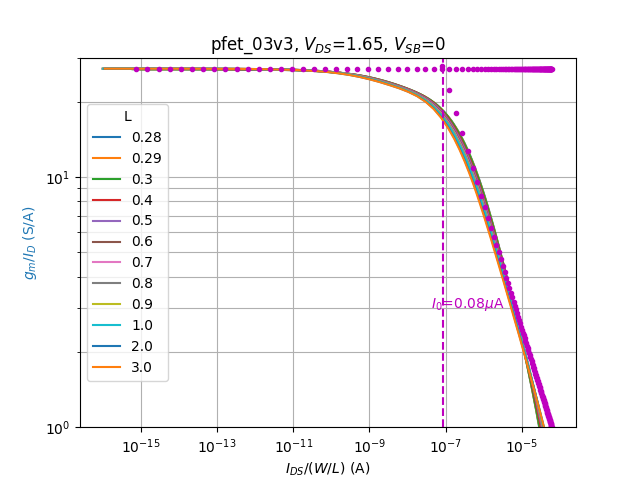

In [7]:
# plot gm/ID versus ID/(W/L)

fig, ax1 = plt.subplots()
ax1.grid(which='both')
ax1.set_xlabel('$I_{DS}/(W/L)$ (A)')
color = 'tab:blue'
ax1.set_ylabel('$g_m/I_D$ (S/A)', color=color)
# get data
gm_ids = fet.lookup('GM_ID', L=l, VDS=VDS1, VSB=VSB1)
ids = fet.lookup('ID', L=l, VDS=VDS1, VSB=VSB1)
ax1.loglog((ids / w * l[:, None]).T, gm_ids.T)
# tangents
# strong inversion
x = (ids / w * l[:, None]).T[:,1]
y = K_si[choice]/np.sqrt(x) 
ax1.loglog(x,y,'.',color='m')
# weak inversion
y = K_wi[choice] *np.ones(len(x))
ax1.loglog(x,y,'.',color='m')
# calculate I0
ax1.set_ylim(1, 30)
ax1.legend(loc='center left', title='L', labels=l.tolist())
# fig.tight_layout()
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
label = f"$I_0$={I0[choice]/1e-6:.2f}$\\mu$A"
ax1.text(I0[choice]/2, 3, label, color='m' )
plt.axvline(x=I0[choice], color='m', linestyle='--')
plt.show()

## Gm/ID versus Current Density

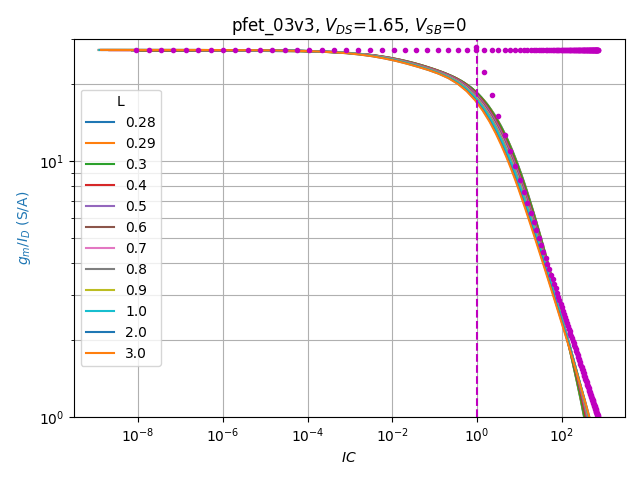

In [8]:
# plot gm/ID versus IC = ID/(W/L)/I0
# using I0 from previous cell

fig, ax1 = plt.subplots()
ax1.grid(which='both')
ax1.set_xlabel('$IC$')
color = 'tab:blue'
ax1.set_ylabel('$g_m/I_D$ (S/A)', color=color)

gm_ids = fet.lookup('GM_ID', L=l, VDS=VDS1, VSB=VSB1)
fts = fet.lookup('GM_CGG', L=l, VDS=VDS1, VSB=VSB1)
ids = fet.lookup('ID', L=l, VDS=VDS1, VSB=VSB1)
ax1.loglog((ids / I0[choice] / w * l[:, None]).T, gm_ids.T)
# ax2.semilogx((ids / w * l[:, None]).T, fts.T)

# tangents
# strong inversion
x = (ids / I0[choice] / w * l[:, None]).T[:,1]
K_si_0 = K_si[choice]/np.sqrt(I0[choice]) 
y = K_si_0/np.sqrt(x) 
ax1.loglog(x,y,'.',color='m')
# weak inversion
y = K_wi[choice] *np.ones(len(x))
ax1.loglog(x,y,'.',color='m')
plt.axvline(x=1, color='m', linestyle='--')

ax1.set_ylim(1, 30)
ax1.legend(loc='center left', title='L', labels=l.tolist())
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))

fig.tight_layout()


## Gm/ID and fT versus ID/(W/L)

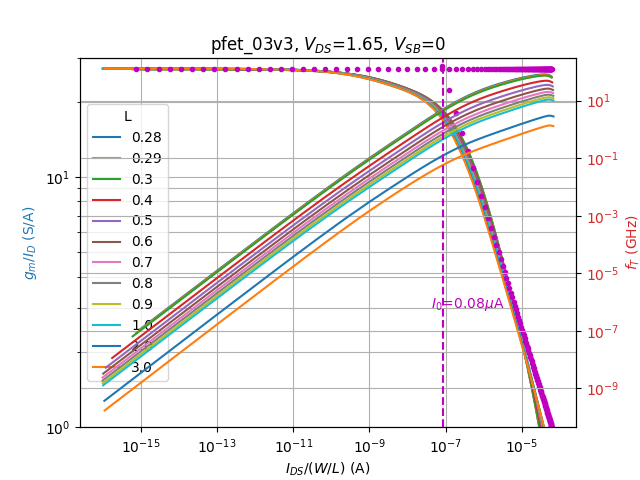

In [9]:
# plot gm/ID & fT versus ID/(W/L)

fig, ax1 = plt.subplots()
ax1.grid(which='both')
ax1.set_xlabel('$I_{DS}/(W/L)$ (A)')
color = 'tab:blue'
ax1.set_ylabel('$g_m/I_D$ (S/A)', color=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('$f_T$ (GHz)', color=color)

ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(True)
# get data
gm_ids = fet.lookup('GM_ID', L=l, VDS=VDS1, VSB=VSB1)
ids = fet.lookup('ID', L=l, VDS=VDS1, VSB=VSB1)
ax1.loglog((ids / w * l[:, None]).T, gm_ids.T)
# tangents
# strong inversion
x = (ids / w * l[:, None]).T[:,1]
y = K_si[choice]/np.sqrt(x) 
ax1.loglog(x,y,'.',color='m')
# weak inversion
y = K_wi[choice] *np.ones(len(x))
ax1.loglog(x,y,'.',color='m')
# calculate I0
ax1.set_ylim(1, 30)
ax1.legend(loc='center left', title='L', labels=l.tolist())

fts = fet.lookup('GM_CGG', L=l , VDS=VDS1, VSB=VSB1)
ax2.loglog((ids / w * l[:, None]).T, fts.T/1e9)

# fig.tight_layout()
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
label = f"$I_0$={I0[choice]/1e-6:.2f}$\\mu$A"
ax1.text(I0[choice]/2, 3, label, color='m' )
plt.axvline(x=I0[choice], color='m', linestyle='--')
plt.show()

## Other Plots

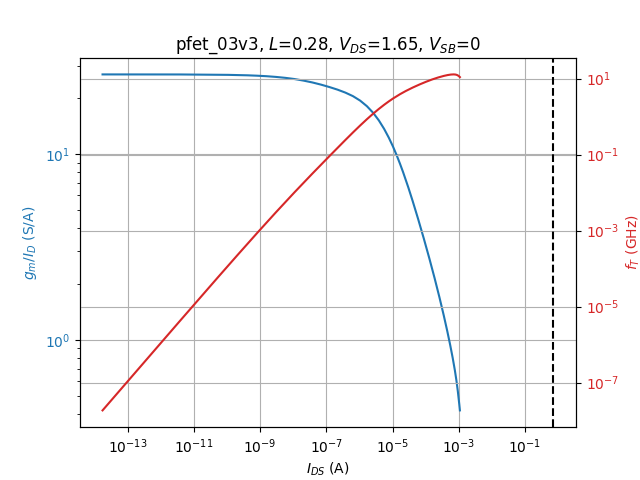

In [10]:
# plot gm/ID and fT versus ID
L1 = min(l); VDS1=1.65; VSB1=0
gm_id1 = fet.lookup('GM_ID', L=L1, VDS=VDS1, VSB=VSB1)
ft1 = fet.lookup('GM_CGG', L=L1, VDS=VDS1, VSB=VSB1)/2/np.pi
vt = fet.lookup('VT', L=L1, VGS=0.9, VDS=VDS1, VSB=VSB1)
ids = fet.lookup('ID', L=L1, VDS=VDS1, VSB=VSB1)

fig, ax1 = plt.subplots()
ax1.grid(axis='x')
ax1.set_xlabel('$I_{DS}$ (A)')
color = 'tab:blue'
ax1.set_ylabel('$g_m/I_D$ (S/A)', color=color)
ax1.loglog(ids, gm_id1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('$f_T$ (GHz)', color=color)
ax2.loglog(ids, ft1/1e9, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(True)
# fig.tight_layout()
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
# plt.xlim(0, 2.5)
plt.axvline(x=vt, color='k', linestyle='--')
plt.show()

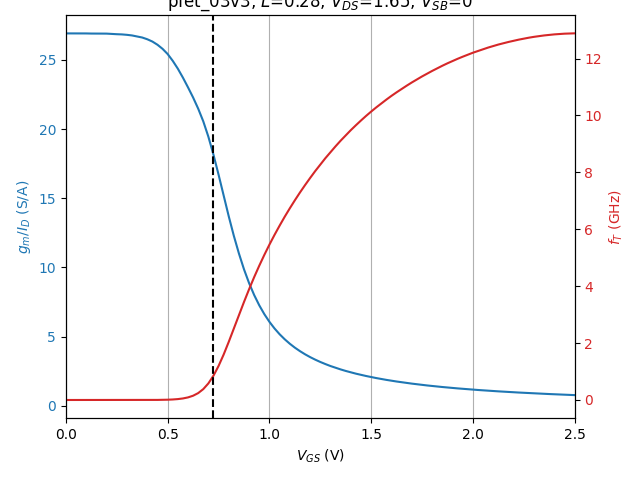

In [11]:
# plot gm/ID and fT versus gate bias
L1 = min(l); VDS1=1.65; VSB1=0
gm_id1 = fet.lookup('GM_ID', L=L1, VDS=VDS1, VSB=VSB1)
ft1 = fet.lookup('GM_CGG', L=L1, VDS=VDS1, VSB=VSB1)/2/np.pi
vt = fet.lookup('VT', L=L1, VGS=0.9, VDS=VDS1, VSB=VSB1)

fig, ax1 = plt.subplots()
ax1.grid(axis='x')
ax1.set_xlabel('$V_{GS}$ (V)')
color = 'tab:blue'
ax1.set_ylabel('$g_m/I_D$ (S/A)', color=color)
ax1.plot(vgs, gm_id1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('$f_T$ (GHz)', color=color)
ax2.plot(vgs, ft1/1e9, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.xlim(0, 2.5)
plt.axvline(x=vt, color='k', linestyle='--')
plt.show()

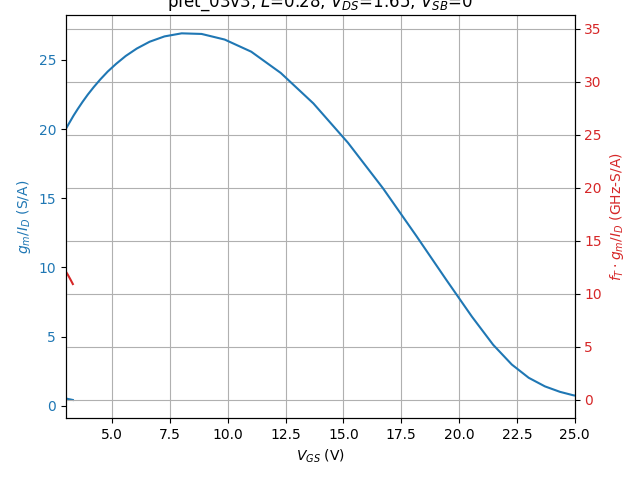

In [12]:
# plot product of gm/ID ant fT versus gm/ID
plt.plot(gm_id1, gm_id1*ft1/1e9)
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T\\cdot g_m/I_D$ (GHz-S/A)')
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

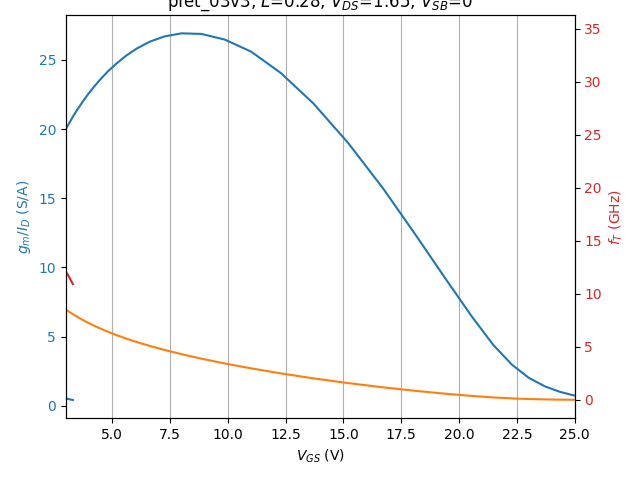

In [13]:
# plot fT versus gm/ID
plt.plot(gm_id1, ft1/1e9)
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T$ (GHz)')
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

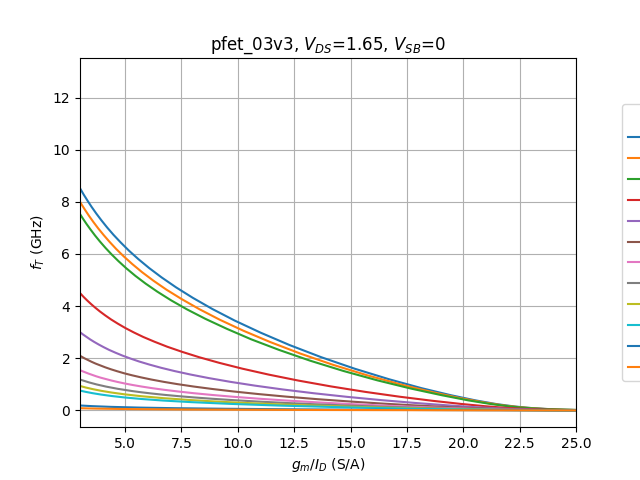

In [14]:
# plot fT versus gm/ID for all L
VDS2=0.9; VSB2=0
gm_id2 = fet.lookup('GM_ID', L=l, VDS=VDS1, VSB=VSB1)
ft2 = fet.lookup('GM_CGG', L=l, VDS=VDS1, VSB=VSB1)/2/np.pi

fig, ax = plt.subplots()
ax.plot(gm_id2.transpose(), ft2.transpose()/1e9)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T$ (GHz)')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

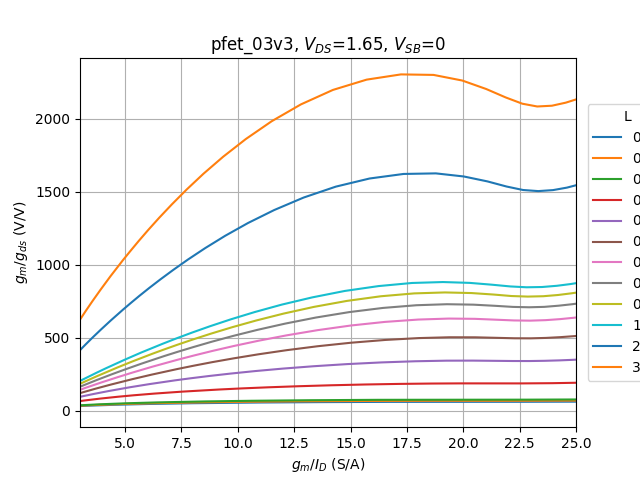

In [15]:
# plot gm/gds versus gm/ID for all L
gm_gds2 = fet.lookup('GM_GDS', L=l, VDS=VDS1, VSB=VSB1)

fig, ax = plt.subplots()
ax.plot(gm_id2.transpose(), gm_gds2.transpose())
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$g_m/g_{ds}$ (V/V)')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

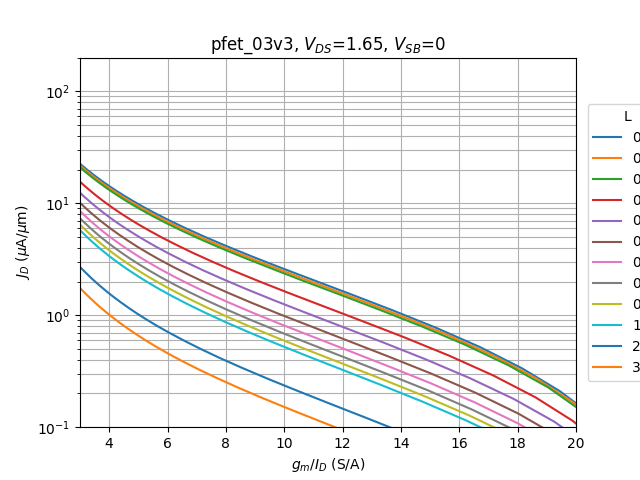

In [16]:
# plot jd versus gm/ID for all L
jd2 = fet.lookup('ID_W', L=l, VDS=VDS1, VSB=VSB1)/1e-6

fig, ax = plt.subplots()
ax.semilogy(gm_id2.transpose(), (jd2).transpose())
# ax.semilogy(gm_id2.transpose(), (jd2 / l[:, None]).transpose())
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(0.1, 200)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$J_D$ ($\\mu$A/$\\mu$m)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()

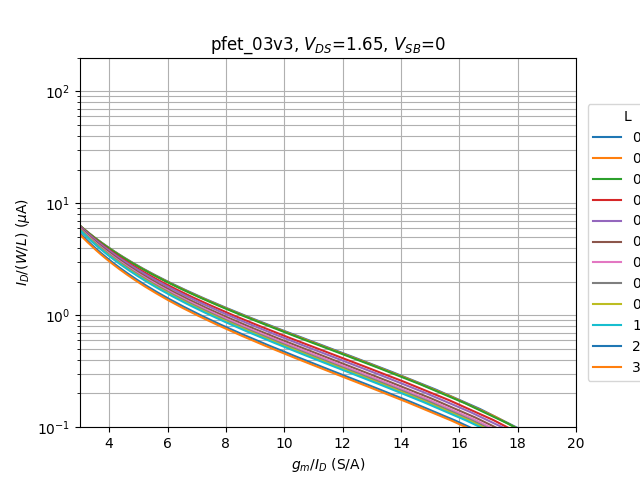

In [17]:
# plot jd versus gm/ID for all L
jd2 = fet.lookup('ID_W', L=l, VDS=VDS1, VSB=VSB1)/1e-6

fig, ax = plt.subplots()
# ax.semilogy(gm_id2.transpose(), (jd2).transpose())
ax.semilogy(gm_id2.transpose(), (jd2 * l[:, None]).transpose())
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(0.1, 200)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$I_D / (W/L)$ ($\\mu$A)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()

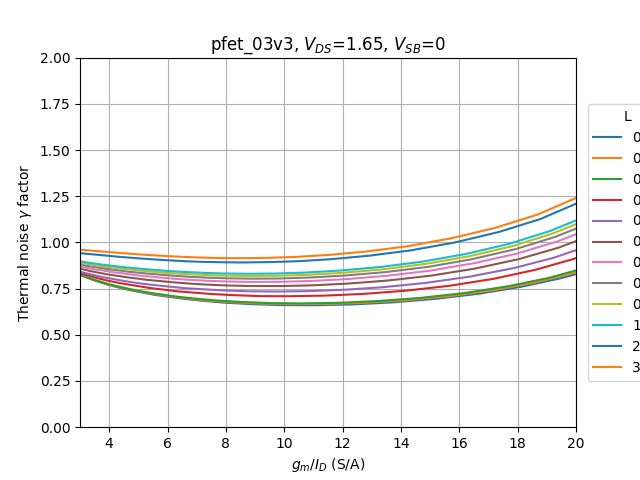

In [18]:
# plot gamma versus gm/ID for all L
gamma = fet.lookup('STH_GM', L=l, VDS=VDS1, VSB=VSB1) / (4*sc.Boltzmann*300)

fig, ax = plt.subplots()
ax.plot(gm_id2.transpose(), gamma.transpose())
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(0, 2)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('Thermal noise $\\gamma$ factor')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()

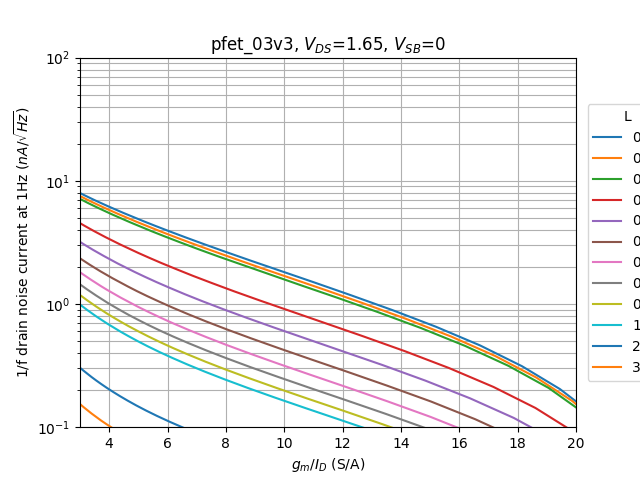

In [19]:
# plot flicker noise drain current at 1Hz versus gm/ID for all L
sfl = fet.lookup('SFL', L=l, VDS=VDS1, VSB=VSB1)**0.5

fig, ax = plt.subplots()
ax.semilogy(gm_id2.transpose(), sfl.transpose()/1e-9)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(0.1, 100)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('1/f drain noise current at 1Hz ($nA/ \\sqrt{Hz}$)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()

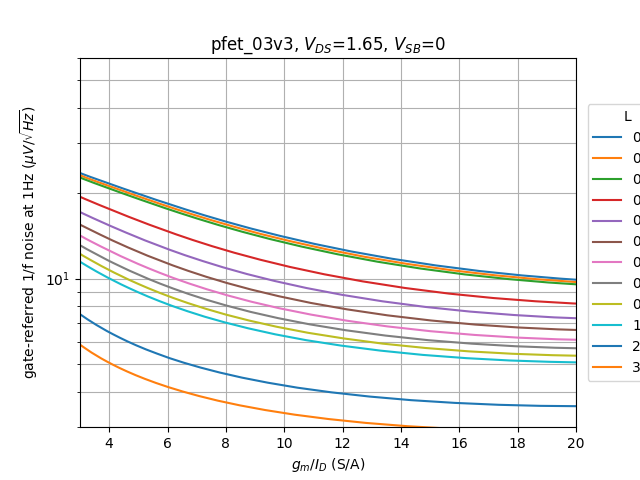

In [20]:
# plot gate-referred 1/f noise at 1Hz versus gm/ID for all L
sfl_gate = fet.lookup('SFL', L=l, VDS=VDS1, VSB=VSB1)**0.5 / fet.lookup('GM', L=l, VDS=VDS1, VSB=VSB1)

fig, ax = plt.subplots()
ax.semilogy(gm_id2.transpose(), sfl_gate.transpose()/1e-6)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(3, 60)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('gate-referred 1/f noise at 1Hz ($\\mu V/ \\sqrt{Hz}$)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()